In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [ ]:
def random_ora(a,b,r1,r2,c):
    Y = list()
    X = np.random.uniform(a-r2,a+r2,c).tolist()
    for x in X:
        if x>a+r1 or x<a-r1:
            lim = np.sin(np.arccos((x-a)/r2))*r2
            Y.append(np.random.uniform(b-lim,b+lim))
        else:
            lim1 = np.sin(np.arccos((x-a)/r1))*r1
            lim2 = np.sin(np.arccos((x-a)/r2))*r2
            rand = np.random.uniform((b+lim1,b-lim2),(b+lim2,b-lim1))
            Y.append(rand[randint(0,1)])
    return np.array(X),np.array(Y)

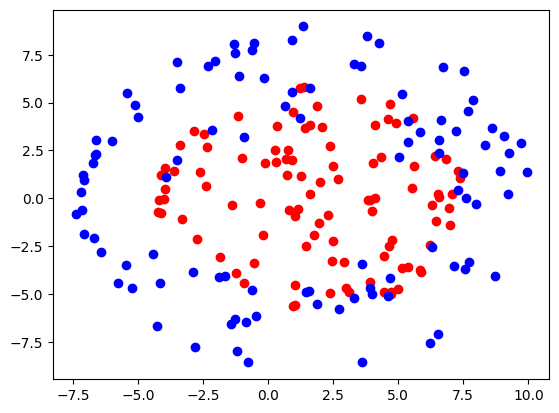

In [ ]:
X11,Y11 = random_ora(1.5, 0, 0, 6, 100)
X12,Y12 = random_ora(1.5, 0, 4, 9, 100)
plt.scatter(X11, Y11, color='r')
plt.scatter(X12, Y12, color='b')
plt.plot()
X1 = np.zeros((200,))
Y1 = np.zeros((200,))
X1[0:100] = X11
X1[100:200] = X12
Y1[0:100] = Y11
Y1[100:200] = Y12
del X11,Y11,X12,Y12

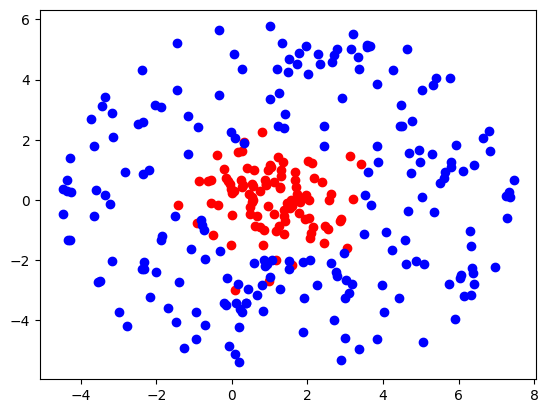

In [ ]:
X21 = np.random.normal(1,1,100)
Y21 = np.random.normal(0,1,100)
X22,Y22 = random_ora(1.5, 0, 2, 6, 200)
plt.scatter(X21, Y21, color='r')
plt.scatter(X22, Y22, color='b')
plt.plot()
X2 = np.zeros((300,))
Y2 = np.zeros((300,))
X2[0:100] = X21
X2[100:300] = X22
Y2[0:100] = Y21
Y2[100:300] = Y22
del X21,Y21,X22,Y22

In [ ]:
labels = np.full((300,), 0)
labels[100:300] = np.full((200,), 1)

In [ ]:
import pandas as pd
def add_dim(X,Y):
    i = 3
    df = pd.DataFrame()
    df['x1'] = X
    df['x2'] = Y
    for j in range(2, 8):
      for k in range(0, j+1):
        col_name = 'x' + str(i)
        i += 1
        df[col_name] = df['x1']**(j-k) * df['x2']**k
    return df

In [ ]:
def train_test_split(X, Y, train_size):
    data = X.tolist()
    label = Y.tolist()
    y_train = list()
    x_train = list()
    y_test = list()
    x_test = list()
    for i in range(len(data)):
        if np.random.uniform(0,1) > train_size:
            x_test.append(data[i])
            y_test.append(label[i])
        else:
            x_train.append(data[i])
            y_train.append(label[i])
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)

In [ ]:
class logistic_regression():

    def __init__(self, epochs, alpha, n_class, lambda_):
        self.epochs = epochs
        self.alpha = alpha
        self.n_class = n_class
        self.lambda_ = lambda_

    def initial_values(self, X_train):
        X = np.ones((X_train.shape[0],X_train.shape[1]+1))
        X[:,1:] = X_train
        w = np.zeros((X.shape[1], self.n_class))
        return X, w
     
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, X, y, h, w):
        m = len(y)
        j_w = (1./2*m) * (((y - h).T @ (y- h)) + self.lambda_ * np.sum(np.square(w)))
        return j_w
    
    def gradient_descent(self, X, y, h, w):
        m = len(y)
        w = w - self.alpha * (1/m)* ( np.dot(X.T, (h-y)) + self.lambda_ * w )
        return w

    def fit(self, X_train, y_train):
        self.w = []
        self.cost = []
        X, w = self.initial_values(X_train)
        
        for i in range(0, self.n_class):
            y = np.where(y_train == np.unique(y_train)[i], 1, 0)
            cost = []
            w_i = w[:, i]
            for epoch in range(self.epochs):
                h = self.sigmoid(X.dot(w_i))
                w_i = self.gradient_descent(X, y, h, w_i)
                cost.append(self.cost_function(X, y, h, w_i))
            self.w.append(w_i)
            self.cost.append(cost)
            
        return np.array(self.w)
      
    def predict(self, X_test):
        classProbabilities = self.sigmoid(np.insert(X_test, 0, 1, axis=1) @ np.array(self.w).T)
        pred = classProbabilities.argmax(axis=1)
        return pred

    def accuracy(self, y, pred):
      return np.mean(pred == y)

In [ ]:
F1 = add_dim(X1, Y1)
X1_train, Y1_train, X1_test, Y1_test = train_test_split(F1.to_numpy(), labels[0:200], train_size=0.8)
log_reg = logistic_regression(10000, 0.001, 2, 0.01)
w1 = log_reg.fit(X1_train, Y1_train)
predictions = log_reg.predict(X1_test)
print("Accuracy:", str(log_reg.accuracy(Y1_test, predictions)))

<ipython-input-310-f0feb005817c>:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 0.7777777777777778


In [ ]:
F2 = add_dim(X2, Y2)
X2_train, Y2_train, X2_test, Y2_test = train_test_split(F2.to_numpy(), labels, train_size=0.8)
log_reg = logistic_regression(10000, 0.001, 2, 0.01)
w2 = log_reg.fit(X2_train, Y2_train)
predictions = log_reg.predict(X2_test)
print("Accuracy:", str(log_reg.accuracy(Y2_test, predictions)))

<ipython-input-310-f0feb005817c>:16: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 0.9436619718309859


In [ ]:
import matplotlib
def plot_border(w, df, y):
  x1 = np.linspace(np.min(df['x1']), np.max(df['x1']), df.shape[0])
  x2 = np.linspace(np.min(df['x2']), np.max(df['x2']), df.shape[0])
  X1, X2 = np.meshgrid(x1, x2)

  p1 = []
  p2 = []
  for j in range(1, 8):
      for k in range(0, j+1):
          p1.append(j-k)
          p2.append(k)

  theta_ = np.reshape(w[1,:], (w.shape[1]))
  f = theta_[0]
  for i in range(0, len(theta_)-1):
      f += theta_[i+1] * ((X1**p1[i])*(X2**p2[i]))
      
  plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))
  plt.contour(X1,X2,f, [-0.11], color="black")
  plt.show()

<ipython-input-307-94a5911feae2>:20: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(X1,X2,f, [-0.11], color="black")


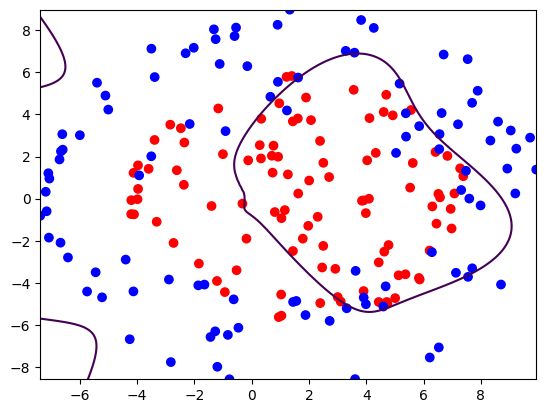

In [ ]:
plot_border(w1, F1, labels[0:200])

<ipython-input-307-94a5911feae2>:20: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(X1,X2,f, [-0.11], color="black")


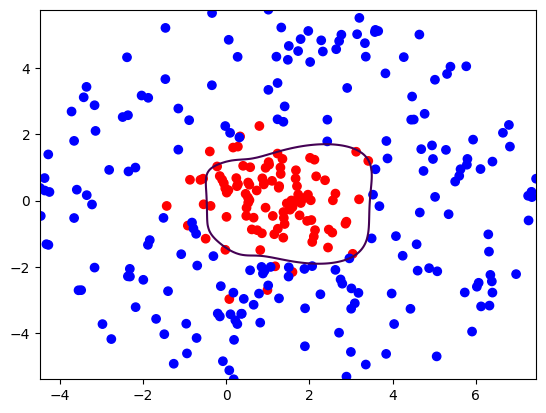

In [ ]:
plot_border(w2, F2, labels)